### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the 1st data file named "actual_duration.csv".
# Create dataframe ad and sense check the dataframe.
ad = pd.read_csv('actual_duration.csv')
print(ad.shape)
print(ad.dtypes)
print(ad.columns)
print(ad.isna().sum())
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Determine the descriptive statistics and metadata of ad.
print(ad.describe())
print(ad.info())

       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [5]:
# Load the 2nd data file named "appointments_regional.csv".
# Create dataframe ar and sense check the dataframe.
ar = pd.read_csv('appointments_regional.csv')
print(ar.shape)
print(ar.dtypes)
print(ar.columns)
print(ar.isna().sum())
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [6]:
# Determine the descriptive statistics and metadata of ar.
print(ar.describe())
print(ar.info())

       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
No

In [7]:
# Load the 3rd data file named "national_categories.csv".
# Create dataframe nc and sense check the dataframe.
nc = pd.read_csv('national_categories.csv')
print(nc.shape)
print(nc.dtypes)
print(nc.columns)
print(nc.isna().sum())
nc.head()

(817394, 8)
appointment_date         object
icb_ons_code             object
sub_icb_location_name    object
service_setting          object
context_type             object
national_category        object
count_of_appointments     int64
appointment_month        object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [8]:
# Determine the descriptive statistics and metadata of nc.
print(nc.describe())
print(nc.info())

       count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   appointment_date       817394 non-null  object
 1   icb_ons_code           817394 non-null  object
 2   sub_icb_location_name  817394 non-null  object
 3   service_setting        817394 non-null  object
 4   context_type           817394 non-null  object
 5   national_category      817394 non-null  object
 6   count_of_appointments  817394 non-null  int64 
 7   appointment_month      817394 non-null  object
dtypes: int64(1), object(7)
memory usage: 49.9+ MB
None


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [9]:
# Determine the number of locations.
# Group the location name column by unique values.
loc_list = nc['sub_icb_location_name'].value_counts()

# Count the no. of unique location name.
loc_count = loc_list.count()
print("Count of Locations:",loc_count)

Count of Locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [10]:
# Determine the top five locations based on record count.
# Create a for loop to identify the top 5 locations from the location by count (loc_list) series.
for i in range(len(loc_list)):
    print("Top", i+1, "Location:", loc_list.index[i], ", Count=",loc_list[i])
    i=i+1
    if i==5:
        break

Top 1 Location: NHS North West London ICB - W2U3Z , Count= 13007
Top 2 Location: NHS Kent and Medway ICB - 91Q , Count= 12637
Top 3 Location: NHS Devon ICB - 15N , Count= 12526
Top 4 Location: NHS Hampshire and Isle Of Wight ICB - D9Y0V , Count= 12171
Top 5 Location: NHS North East London ICB - A3A8R , Count= 11837


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [11]:
# Determine the number of service settings.
# Group the sevice setting column by unique values.
service_list = nc['service_setting'].value_counts()

# Count the no. of unique service setting.
service_count = service_list.count()
print("Count of Service Setting:",service_count)

Count of Service Setting: 5


In [12]:
# Determine the number of context types.
# Group the context type column by unique values.
context_list = nc['context_type'].value_counts()

# Count the no. of unique context type.
context_count = context_list.count()
print("Count of Context Type:",context_count)

Count of Context Type: 3


In [13]:
# Determine the number of national categories.
# Group the national category column by unique values.
category_list = nc['national_category'].value_counts()

# Count the no. of national category.
category_count = category_list.count()
print("Count of National Category:",category_count)

Count of National Category: 18


In [14]:
# Determine the number of appointment status.
# Group the appointment status column by unique values.
app_status_list = ar['appointment_status'].value_counts()

# Count the no. of appointment status.
app_status_count = app_status_list.count()
print("Count of Appointment Status:",app_status_count)

Count of Appointment Status: 3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [15]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [16]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021/8/2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [17]:
# Change the date format of ad['appointment_date'].
ad['appointment_date']= pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [18]:
# Change the date format of nc['appointment_date'].
nc['appointment_date']= pd.to_datetime(nc['appointment_date'], format="%Y/%m/%d")

# View the DateFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [19]:
# Determine the minimum and maximum dates in the ad DataFrame.
print("First Date of Scheduled Appointments:",ad['appointment_date'].min().date())
print("Last Date of Scheduled Appointments:",ad['appointment_date'].max().date())

First Date of Scheduled Appointments: 2021-12-01
Last Date of Scheduled Appointments: 2022-06-30


In [20]:
# Determine the minimum and maximum dates in the nc DataFrame.
print("First Date of Scheduled Appointments:",nc['appointment_date'].min().date())
print("Last Date of Scheduled Appointments:",nc['appointment_date'].max().date())

First Date of Scheduled Appointments: 2021-08-01
Last Date of Scheduled Appointments: 2022-06-30


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [21]:
# Identify the code of location "NHS North West London ICB - W2U3Z".
nc.loc[nc['sub_icb_location_name'] == "NHS North West London ICB - W2U3Z", 'icb_ons_code'].iloc[0]

# Create a subset from the nc DataFrame with date and location code filter applied.
nc['appointment_date']= pd.to_datetime(nc['appointment_date'], format="%Y/%m/%d")
nc_subset=nc[(nc['icb_ons_code']=='E54000027')&((nc['appointment_date']>= "2022-01-01")& (nc['appointment_date'] <= "2022-06-01"))]

# For each of these service settings, determine the number of records available for the period and the location.
svc_set=nc_subset.groupby('service_setting')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)

# View the most popular service setting output.
svc_set.iloc[0:1]

,count_of_appointments
service_setting,
General Practice,4804239


**Question 3:** Which month had the highest number of appointments?

In [34]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
app_month = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)
# View the month with highest no. of appointments output.
app_month.iloc[0:1]

,,count_of_appointments
appointment_date,appointment_date,
2021,11,30405070


**Question 4:** What was the total number of records per month?

In [23]:
# Get total number of records per month by aggregating count of appointments by month.
nc.groupby(nc['appointment_month'], )[['count_of_appointments']].sum()

,count_of_appointments
appointment_month,
2021-08,23852171
2021-09,28522501
2021-10,30303834
2021-11,30405070
2021-12,25140776
2022-01,25635474
2022-02,25355260
2022-03,29595038
2022-04,23913060


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [52]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [53]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month']=nc['appointment_month'].astype(str)

# Verify the appointment month data type.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [54]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss=nc.groupby([nc['appointment_month'], nc['service_setting']])[['count_of_appointments']].sum().reset_index()

# View output.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Service settings:**

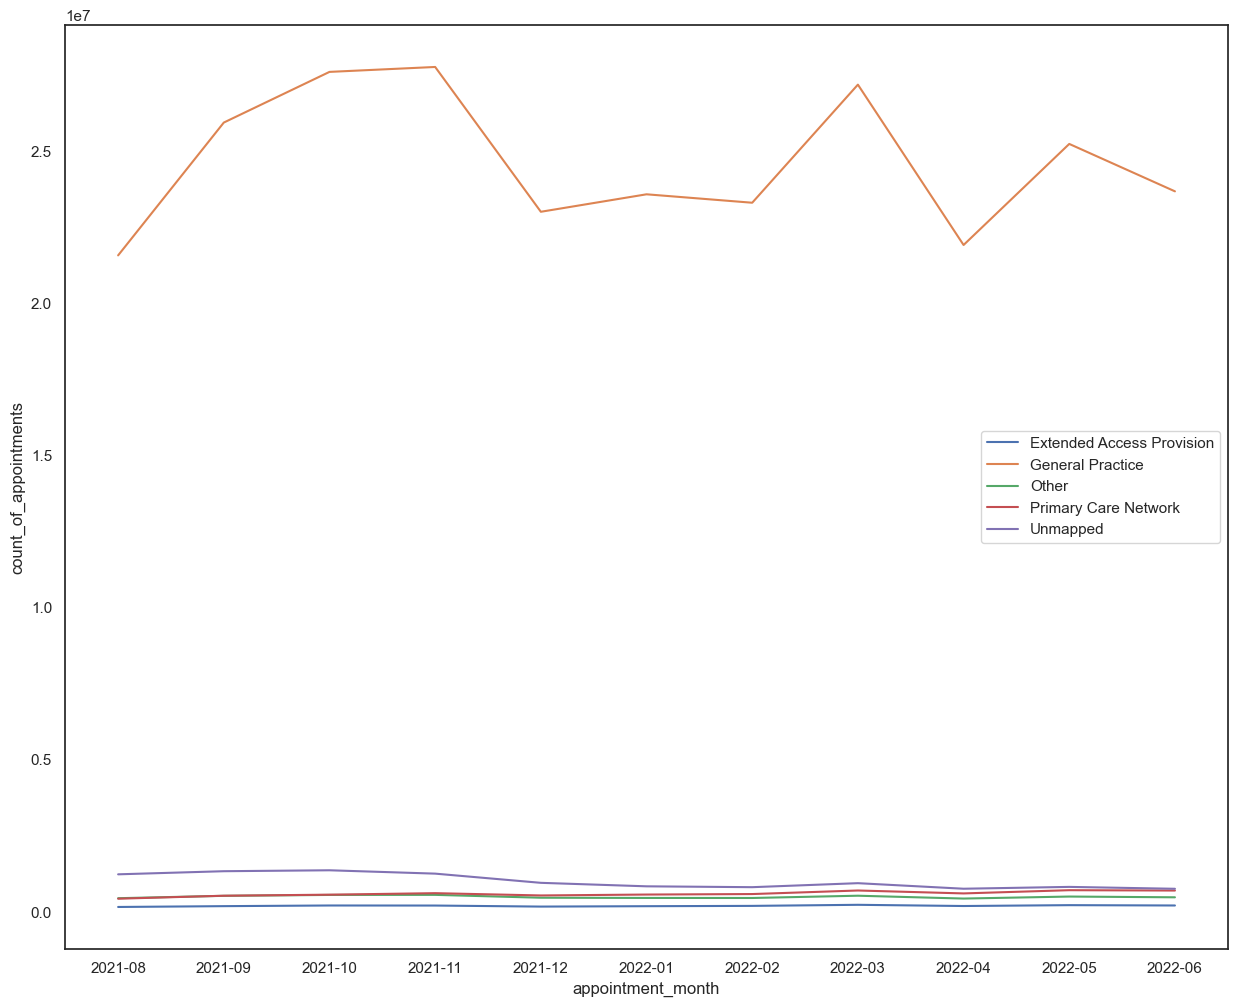

In [55]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss,hue ='service_setting',ci=None)
plt.legend(loc='best')

**Context types:**

In [56]:
# Create a separate data set that can be used in future weeks. 
nc_ct=nc.groupby([nc['appointment_month'], nc['context_type']])[['count_of_appointments']].sum().reset_index()

# View output.
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


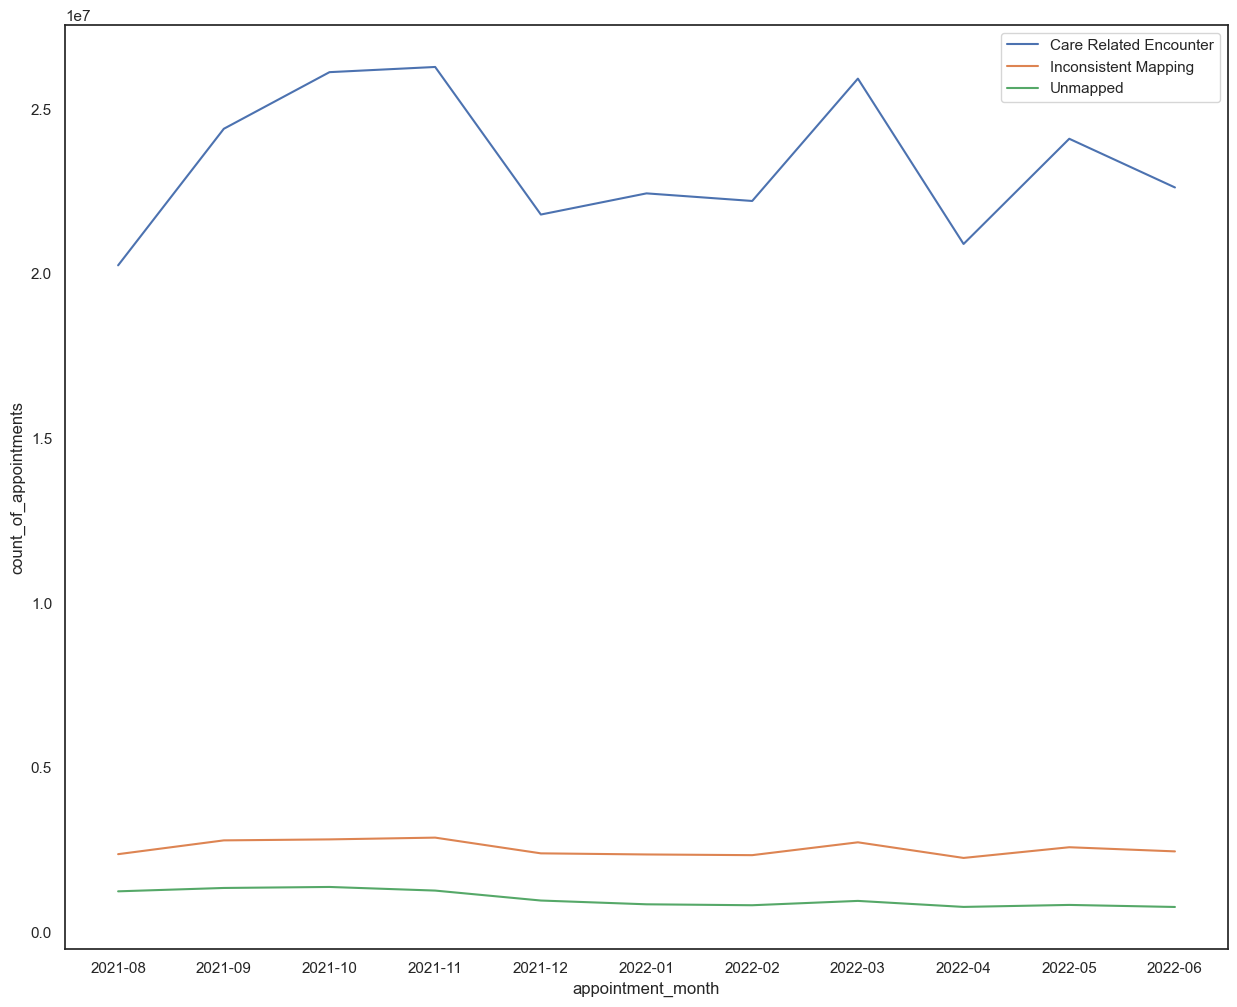

In [57]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ct,hue ='context_type',ci=None)
plt.legend(loc='best')

**National categories:**

In [58]:
# Create a separate data set that can be used in future weeks. 
nc_nc=nc.groupby([nc['appointment_month'], nc['national_category']])[['count_of_appointments']].sum().reset_index()

# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


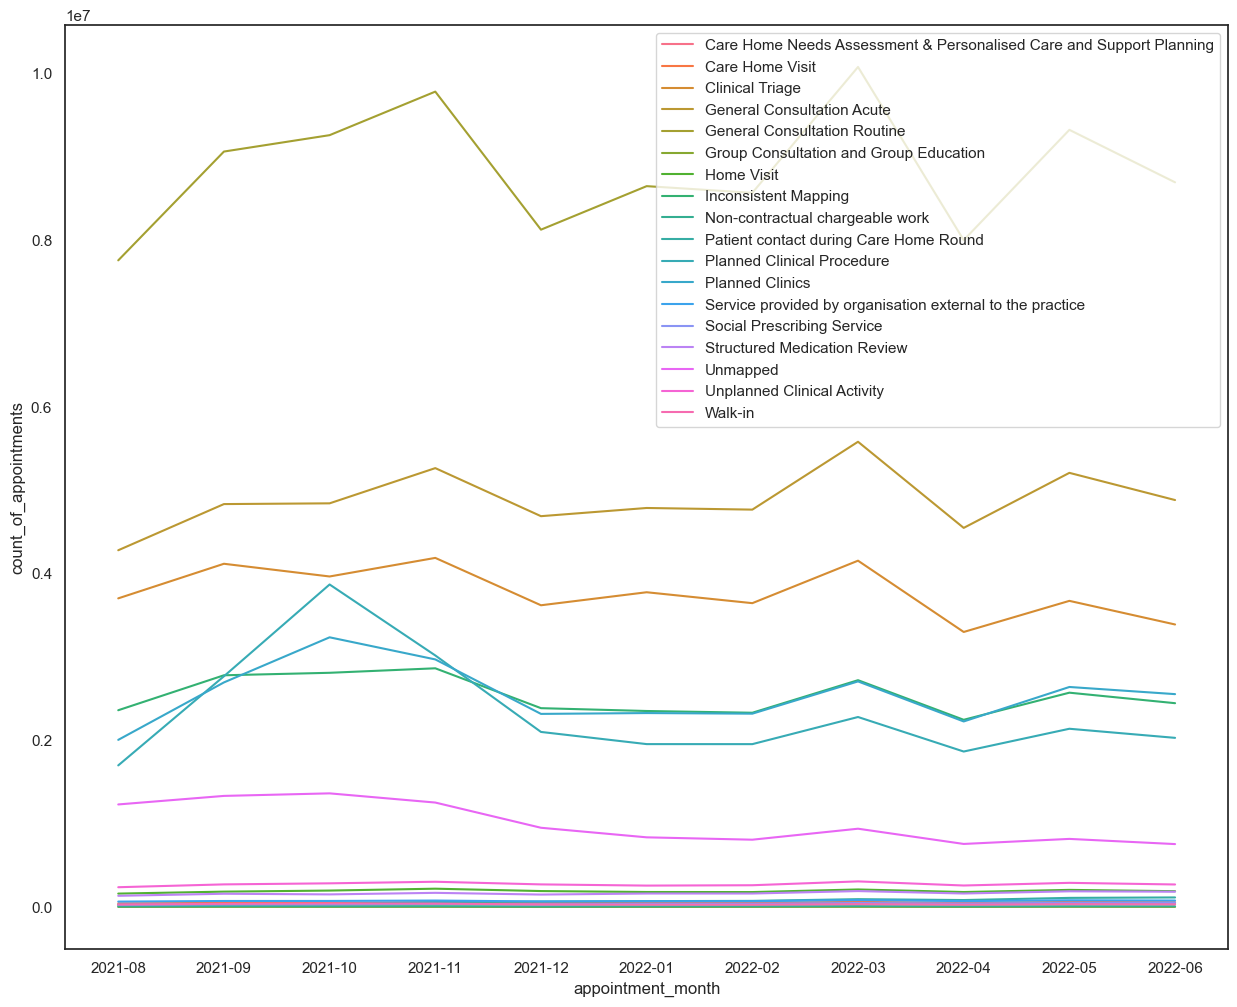

In [59]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_nc,hue ='national_category',ci=None)
plt.legend(loc='best')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [61]:
# Create a separate data set that can be used in future weeks. 
nc_ss=nc.groupby([nc['appointment_month'], nc['appointment_date'], nc['service_setting']])[['count_of_appointments']].sum().reset_index()
nc_ss_day=nc_ss[(nc_ss['appointment_month']==('2021-08'))|(nc_ss['appointment_month']==('2021-10'))|(nc_ss['appointment_month']==('2022-01'))|(nc_ss['appointment_month']==('2022-04'))]

# View output.
nc_ss_day.head()

,appointment_month,appointment_date,service_setting,count_of_appointments
0,2021-08,2021-08-01,Extended Access Provision,438
1,2021-08,2021-08-01,General Practice,3411
2,2021-08,2021-08-01,Other,401
3,2021-08,2021-08-01,Primary Care Network,323
4,2021-08,2021-08-01,Unmapped,1054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Appointment Count by Service Setting (Summer 2021)'}, xlabel='Appointment Date', ylabel='Appointment Count'>

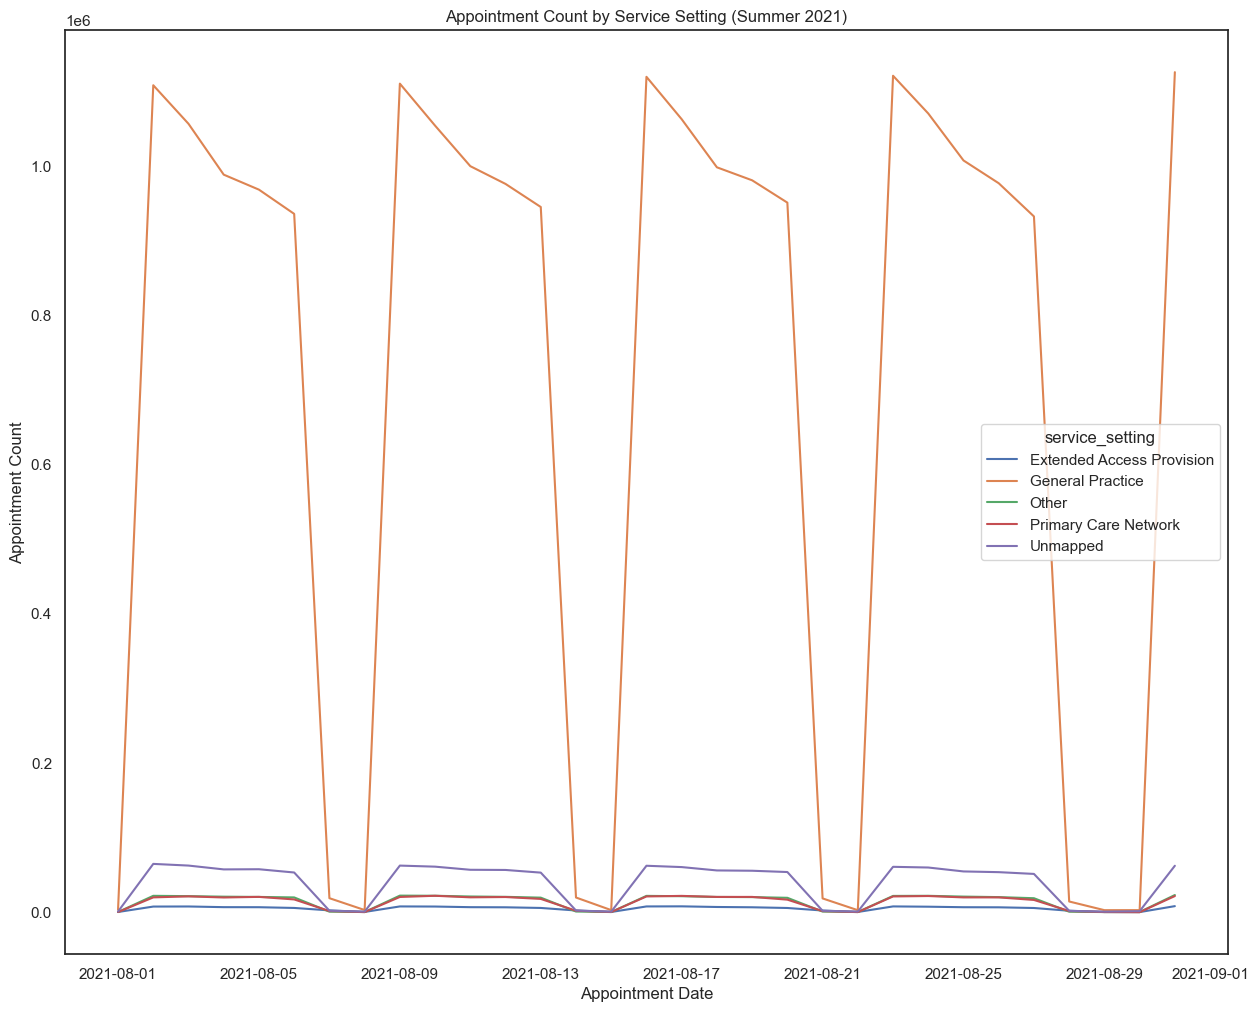

In [65]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()
ax.set_xlabel("Appointment Date")
ax.set_ylabel("Appointment Count")
ax.set_title("Appointment Count by Service Setting (Summer 2021)")
plt.legend(loc='best')

sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']==('2021-08')],hue ='service_setting',ci=None)

**Autumn (October 2021):**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Appointment Count by Service Setting (Autumn 2021)'}, xlabel='Appointment Date', ylabel='Appointment Count'>

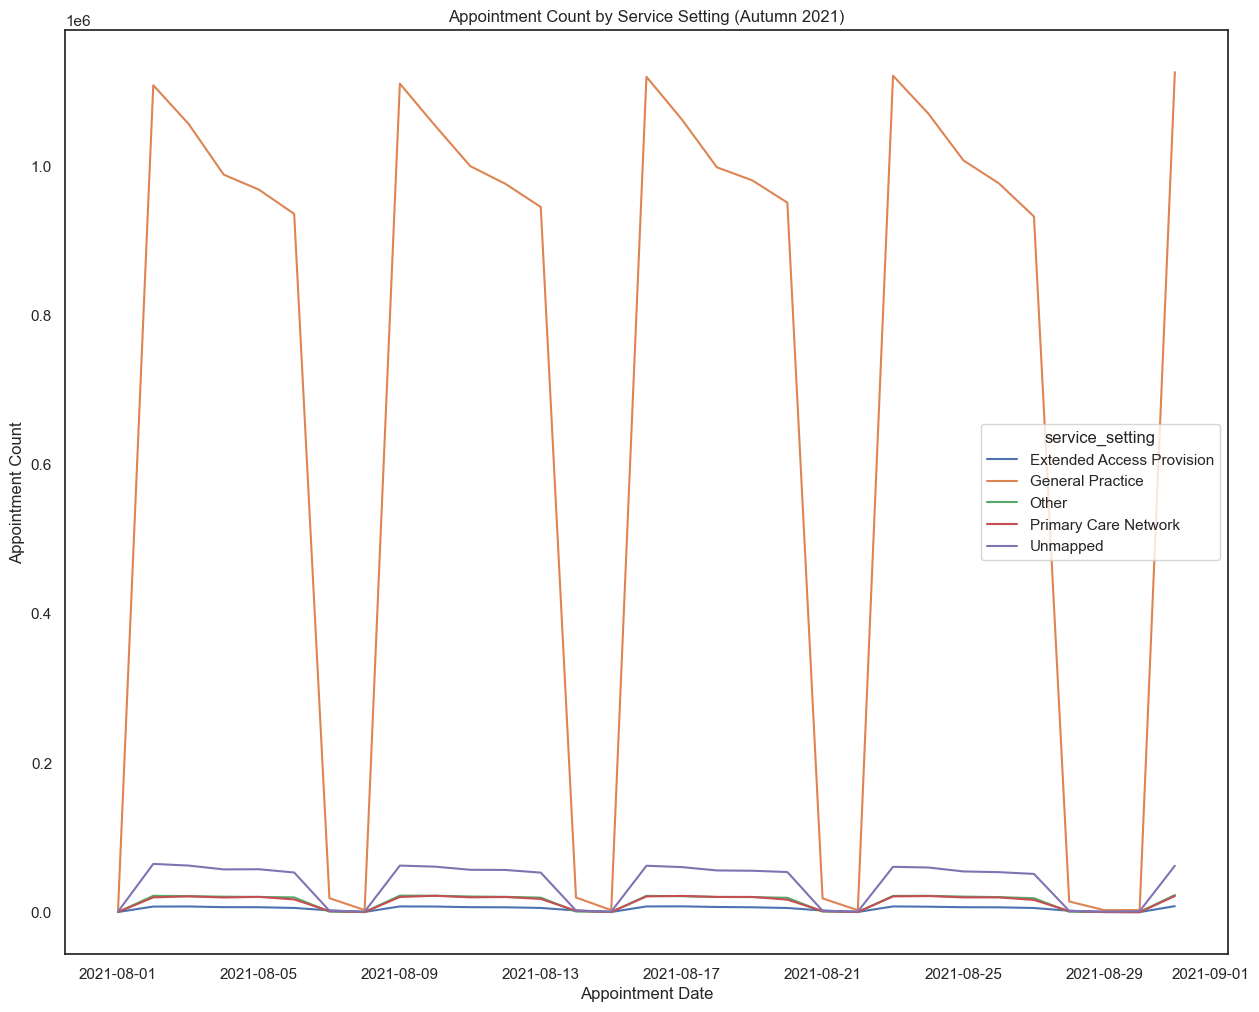

In [68]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()
ax.set_xlabel("Appointment Date")
ax.set_ylabel("Appointment Count")
ax.set_title("Appointment Count by Service Setting (Autumn 2021)")
plt.legend(loc='best')

sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']==('2021-08')],hue ='service_setting',ci=None)

**Winter (January 2022):**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Appointment Count by Service Setting (Winter 2022)'}, xlabel='Appointment Date', ylabel='Appointment Count'>

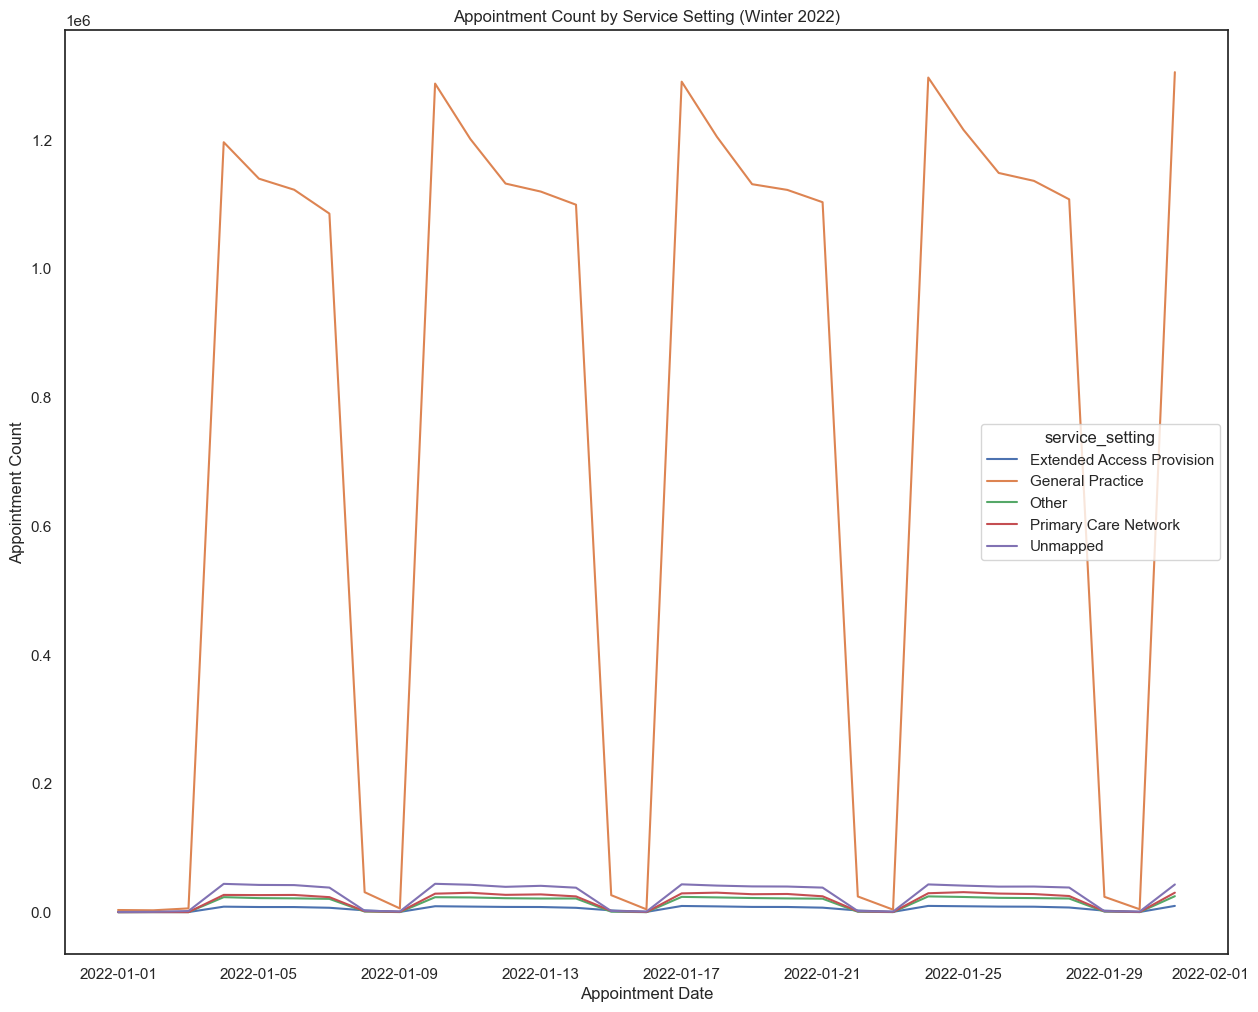

In [67]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()
ax.set_xlabel("Appointment Date")
ax.set_ylabel("Appointment Count")
ax.set_title("Appointment Count by Service Setting (Winter 2022)")
plt.legend(loc='best')

sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']==('2022-01')],hue ='service_setting',ci=None)

**Spring (April 2022):**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Appointment Count by Service Setting (Spring 2022)'}, xlabel='Appointment Date', ylabel='Appointment Count'>

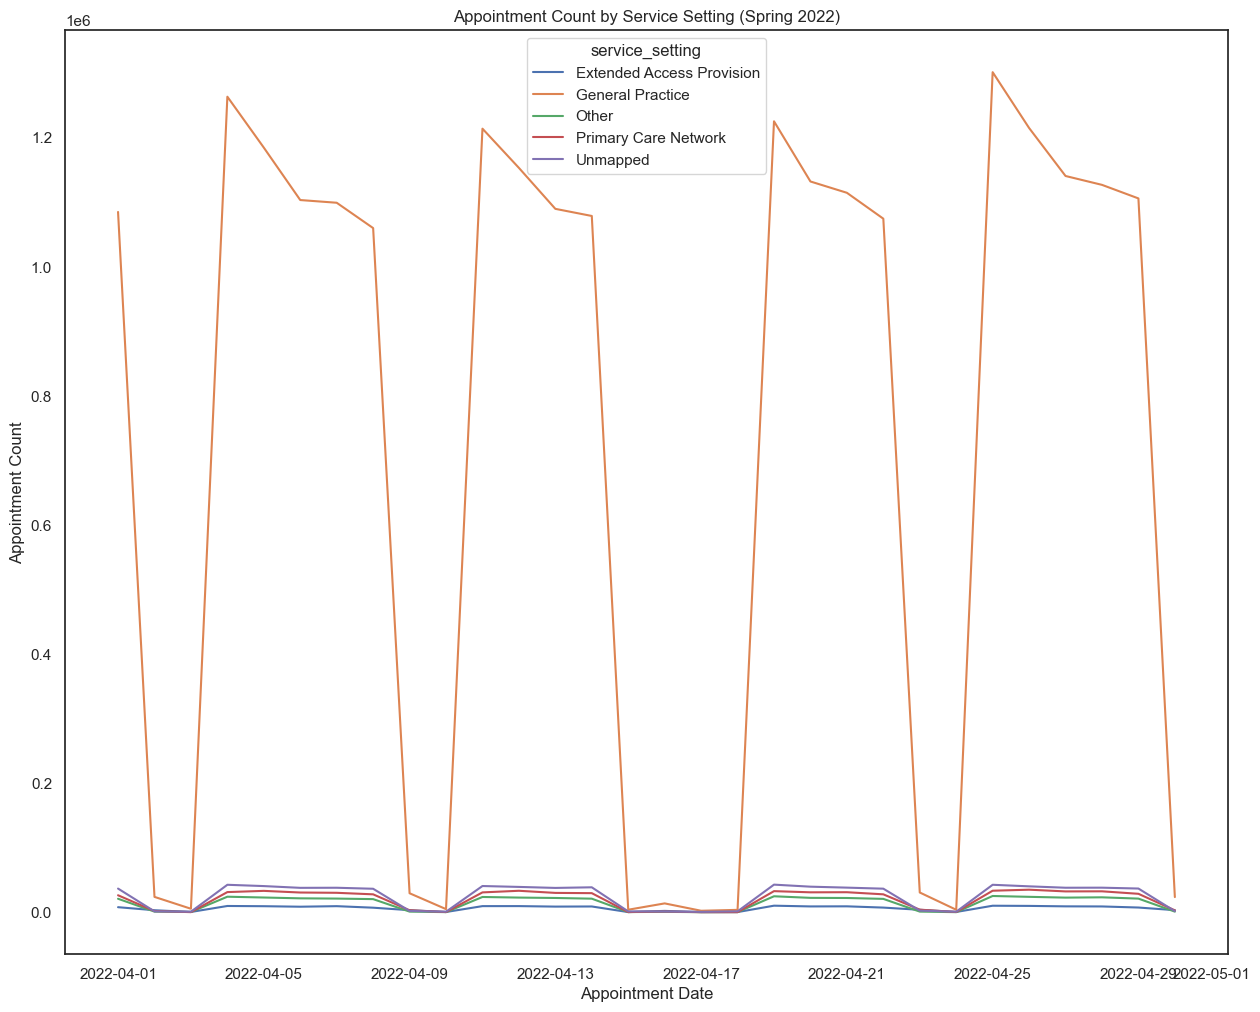

In [69]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()
ax.set_xlabel("Appointment Date")
ax.set_ylabel("Appointment Count")
ax.set_title("Appointment Count by Service Setting (Spring 2022)")
plt.legend(loc='best')

sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day[nc_ss_day['appointment_month']==('2022-04')],hue ='service_setting',ci=None)

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [ ]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [ ]:
# Load the data set.


# View the DataFrame.


In [ ]:
# Explore the metadata.


In [ ]:
# Explore the data set.


In [ ]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [ ]:
# Create a new DataFrame containing only the text.


# View the DataFrame.


In [ ]:
# Loop through the messages, and create a list of values containing the # symbol.


In [ ]:
# Display the first 30 records.


In [ ]:
# Convert the series to a DataFrame in preparation for visualisation.


# Rename the columns.


In [ ]:
# Fix the count datatype.


# View the result.


In [ ]:
# Display records where the count is larger than 10.


In [ ]:
# Create a Seaborn barplot indicating records with a count >10 records.


In [ ]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.


In [ ]:
# Print the min and max dates.


In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.


# View the DataFrame.


In [ ]:
# Determine the total number of appointments per month.


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


In [ ]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


In [ ]:
# Plot monthly capacity utilisation.


# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.


**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.


**Question 6:** How do the spread of service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


In [1]:
# Create a boxplot to investigate spread of service settings.


In [ ]:
# Create a boxplot to investigate the service settings without GP.


# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.